In [1]:
# Synthetic dataset
from sklearn.datasets import make_classification

#Data processing
import pandas as pd
import numpy as np
from collections import Counter 

#Visualization
import matplotlib.pyplot as plt 

#Model and performance
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [2]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1,
                           weights=[0.995,0.001],
                           class_sep=0.5, random_state=0)

#Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

#Check the target distribution
df['target'].value_counts(normalize = True)

target
0    0.99169
1    0.00831
Name: proportion, dtype: float64

In [3]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

# Analyze class distribution in the training set
class_counts = Counter(y_train)
majority_class, majority_count = sorted(class_counts.items())[0]
minority_class, minority_count = sorted(class_counts.items())[-1]

print(f"The training dataset has {majority_count} records for the majority class ({majority_class})")
print(f"and {minority_count} records for the minority class ({minority_class})")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79346 records for the majority class (0)
and 654 records for the minority class (1)


In [4]:
# Train the one support vector machine (SVM) model
one_class_svm = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [5]:
# Predict the anomalies 
prediction = one_class_svm.predict(X_test)

#Change the anomalies' values and to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]

#Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19823
           1       0.05      0.06      0.05       177

    accuracy                           0.98     20000
   macro avg       0.52      0.52      0.52     20000
weighted avg       0.98      0.98      0.98     20000



In [6]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)

#Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold: .2f}')

# Check the model performance at 2% threshold 
customized_prediction = [1 if i < score_threshold else 0 for i in score]

#Check the prediction performance 
print(classification_report(y_test, customized_prediction))

The customized score threshold for 2% of outliers is  183.68
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19823
           1       0.04      0.09      0.06       177

    accuracy                           0.97     20000
   macro avg       0.52      0.54      0.52     20000
weighted avg       0.98      0.97      0.98     20000



In [7]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_customized'] = customized_prediction

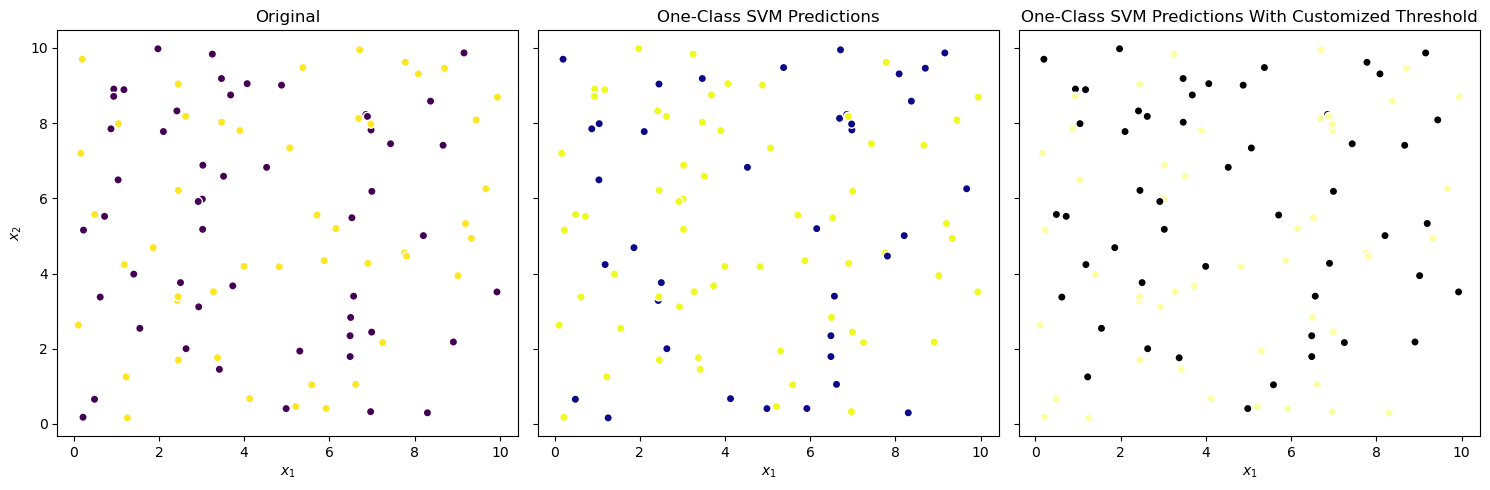

In [8]:
# Example data
x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)
y_test = np.random.choice([0, 1], size=100)  # Ground truth
one_class_svm_prediction = np.random.choice([0, 1], size=100)  # SVM prediction
one_class_svm_prediction_customized = np.random.choice([0, 1], size=100)  # Customized threshold prediction

# Create subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Ground truth
ax0.set_title('Original')
scatter0 = ax0.scatter(x1, x2, c=y_test, cmap='viridis', edgecolors='w')
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
scatter1 = ax1.scatter(x1, x2, c=one_class_svm_prediction, cmap='plasma', edgecolors='w')
ax1.set_xlabel('$x_1$')

# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
scatter2 = ax2.scatter(x1, x2, c=one_class_svm_prediction_customized, cmap='inferno', edgecolors='w')
ax2.set_xlabel('$x_1$')

# Clean and show plot
plt.tight_layout()
plt.show()

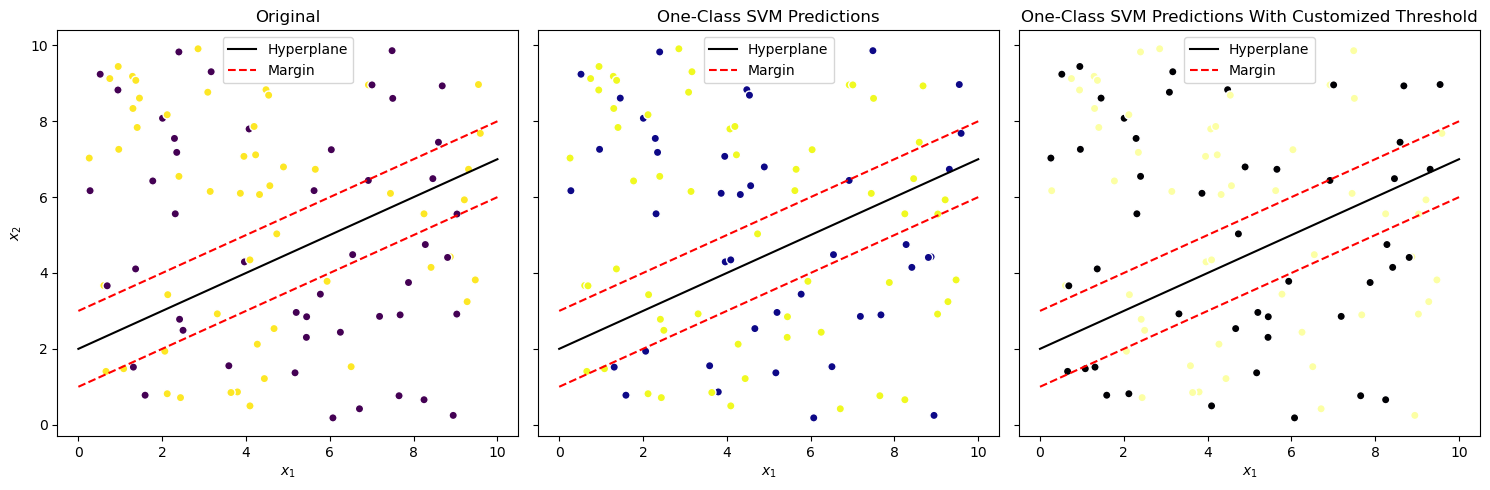

In [9]:
# Example data
x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)
y_test = np.random.choice([0, 1], size=100)  # Ground truth
one_class_svm_prediction = np.random.choice([0, 1], size=100)  # SVM prediction
one_class_svm_prediction_customized = np.random.choice([0, 1], size=100)  # Customized threshold prediction

# Define hyperplane and margins
x_vals = np.linspace(0, 10, 100)
decision_boundary = 0.5 * x_vals + 2  # Hyperplane (dummy example)
margin_upper = 0.5 * x_vals + 3       # Upper margin
margin_lower = 0.5 * x_vals + 1       # Lower margin

# Create subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Ground truth
ax0.set_title('Original')
scatter0 = ax0.scatter(x1, x2, c=y_test, cmap='viridis', edgecolors='w')
ax0.plot(x_vals, decision_boundary, 'k-', label='Hyperplane')  # Hyperplane
ax0.plot(x_vals, margin_upper, 'r--', label='Margin')          # Upper margin
ax0.plot(x_vals, margin_lower, 'r--')                         # Lower margin
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')
ax0.legend()

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
scatter1 = ax1.scatter(x1, x2, c=one_class_svm_prediction, cmap='plasma', edgecolors='w')
ax1.plot(x_vals, decision_boundary, 'k-', label='Hyperplane')  # Hyperplane
ax1.plot(x_vals, margin_upper, 'r--', label='Margin')          # Upper margin
ax1.plot(x_vals, margin_lower, 'r--')                         # Lower margin
ax1.set_xlabel('$x_1$')
ax1.legend()

# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
scatter2 = ax2.scatter(x1, x2, c=one_class_svm_prediction_customized, cmap='inferno', edgecolors='w')
ax2.plot(x_vals, decision_boundary, 'k-', label='Hyperplane')  # Hyperplane
ax2.plot(x_vals, margin_upper, 'r--', label='Margin')          # Upper margin
ax2.plot(x_vals, margin_lower, 'r--')                         # Lower margin
ax2.set_xlabel('$x_1$')
ax2.legend()

# Clean and show plot
plt.tight_layout()
plt.show()


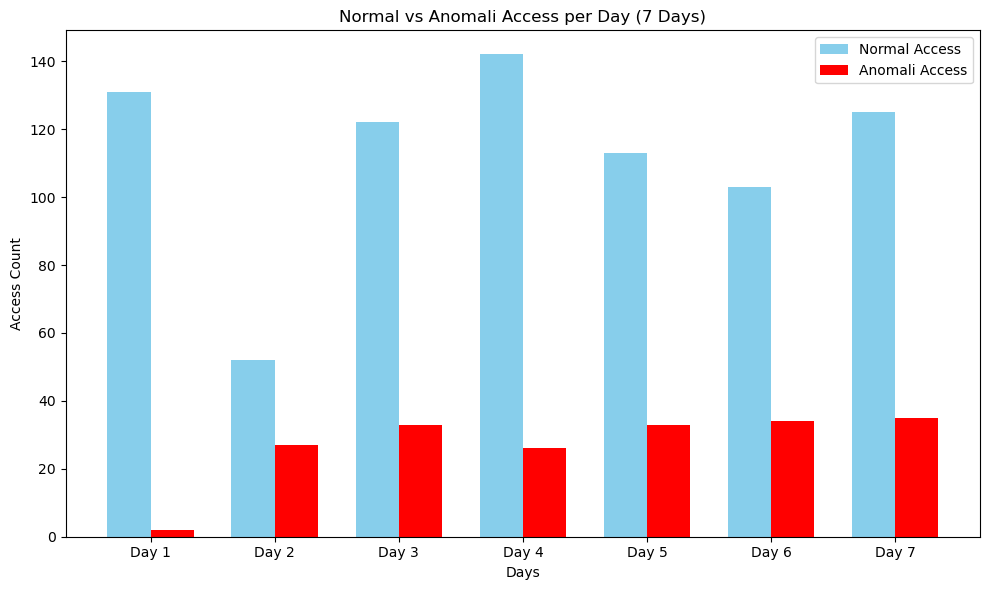

In [10]:
# Generate example data
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
normal_access = np.random.randint(50, 150, size=7)  # Normal access counts per day
anomaly_access = np.random.randint(0, 50, size=7)   # Anomaly access counts per day

# Create a bar chart
x = np.arange(len(days))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, normal_access, width, label='Normal Access', color='skyblue')
bars2 = ax.bar(x + width/2, anomaly_access, width, label='Anomali Access', color='red')

# Add labels, title, and legend
ax.set_xlabel('Days')
ax.set_ylabel('Access Count')
ax.set_title('Normal vs Anomali Access per Day (7 Days)')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()